## MLP

### Imports

In [120]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [121]:
data = pd.read_csv('datasets/BNFs_LMA_DATA.csv')

y = data.pop('EMOTION')
X = data

data.head()

no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)

classes = y.unique()
num_classes = len(y.unique())
print("Classes:", classes)
print("Num Classes:", num_classes)

X.head()

No. entries: 22000 
No. Features: 33
Classes: ['afraid' 'angry' 'bored' 'disgusted' 'excited' 'happy' 'neutral'
 'pleased' 'relaxed' 'sad' 'tired']
Num Classes: 11


,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.540381,0.495284,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.001726
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.540541,0.495912,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.001375
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.540611,0.495445,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.000992
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.540575,0.495760,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.000988
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.540601,0.495548,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.001547


In [122]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)
print(y, "\n")

print(y.shape[1])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]] 

11


### Get Train/Test datasets

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [124]:
X_train.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_pelvis_velocity_y,avg_pelvis_velocity_z,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_distance_traveled
16867,0.398979,0.421488,0.493688,0.338492,0.578592,0.380410,0.535739,0.279518,0.474895,0.944358,...,0.284773,0.481100,0.599436,0.404331,0.316039,0.651326,0.347962,0.467072,0.337073,0.300198
15178,0.375873,0.339553,0.220944,0.245633,0.671640,0.574658,0.556427,0.487828,0.321341,0.967171,...,0.574465,0.526623,0.587829,0.413656,0.515335,0.651089,0.453526,0.371135,0.341135,0.033661
1955,0.321530,0.652459,0.629018,0.241863,0.717548,0.697528,0.660126,0.630001,0.312594,0.998416,...,0.589907,0.561710,0.584900,0.412836,0.500658,0.632083,0.411552,0.477461,0.397051,0.158704
10769,0.754866,0.899332,0.183086,0.467214,0.908021,0.575157,0.920996,0.458459,0.501297,0.945455,...,0.608850,0.483753,0.595595,0.424732,0.433859,0.630670,0.331058,0.527180,0.572806,0.080293
10856,0.466874,0.352095,0.301774,0.391275,0.666628,0.639077,0.608401,0.570749,0.326203,0.873944,...,0.533638,0.554795,0.601124,0.441563,0.612517,0.645818,0.424611,0.507667,0.474411,0.163163


### Define Network

In [125]:
model = Sequential()

model.add(Dense(64, input_dim = no_variables, activation = 'relu')) #Input

model.add(Dense(48, activation = 'relu'))
model.add(Dense(22, activation = 'relu'))

model.add(Dense(num_classes, activation='softmax')) #Output

In [126]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

### Train

In [127]:
model.fit(X_train, y_train, epochs = 512, shuffle = True, batch_size=16)

Epoch 1/512
922/922 [==============================] - 1s 864us/step - loss: 1.9428 - accuracy: 0.3059
Epoch 2/512
922/922 [==============================] - 1s 889us/step - loss: 1.5244 - accuracy: 0.4396
Epoch 3/512
922/922 [==============================] - 1s 903us/step - loss: 1.4326 - accuracy: 0.4716
Epoch 4/512
922/922 [==============================] - 1s 886us/step - loss: 1.3721 - accuracy: 0.4923
Epoch 5/512
922/922 [==============================] - 1s 910us/step - loss: 1.3199 - accuracy: 0.5134
Epoch 6/512
922/922 [==============================] - 1s 866us/step - loss: 1.2741 - accuracy: 0.5264
Epoch 7/512
922/922 [==============================] - 1s 870us/step - loss: 1.2424 - accuracy: 0.5364
Epoch 8/512
922/922 [==============================] - 1s 866us/step - loss: 1.2091 - accuracy: 0.5520
Epoch 9/512
922/922 [==============================] - 1s 869us/step - loss: 1.1816 - accuracy: 0.5610
Epoch 10/512
922/922 [==============================] - 1s 872us/step - l

922/922 [==============================] - 1s 869us/step - loss: 0.7563 - accuracy: 0.7092
Epoch 80/512
922/922 [==============================] - 1s 866us/step - loss: 0.7542 - accuracy: 0.7141
Epoch 81/512
922/922 [==============================] - 1s 863us/step - loss: 0.7586 - accuracy: 0.7107
Epoch 82/512
922/922 [==============================] - 1s 864us/step - loss: 0.7558 - accuracy: 0.7126
Epoch 83/512
922/922 [==============================] - 1s 873us/step - loss: 0.7461 - accuracy: 0.7168
Epoch 84/512
922/922 [==============================] - 1s 869us/step - loss: 0.7477 - accuracy: 0.7148
Epoch 85/512
922/922 [==============================] - 1s 865us/step - loss: 0.7422 - accuracy: 0.7155
Epoch 86/512
922/922 [==============================] - 1s 864us/step - loss: 0.7448 - accuracy: 0.7172
Epoch 87/512
922/922 [==============================] - 1s 867us/step - loss: 0.7430 - accuracy: 0.7203
Epoch 88/512
922/922 [==============================] - 1s 864us/step - loss:

922/922 [==============================] - 1s 877us/step - loss: 0.6487 - accuracy: 0.7571
Epoch 158/512
922/922 [==============================] - 1s 866us/step - loss: 0.6363 - accuracy: 0.7583
Epoch 159/512
922/922 [==============================] - 1s 867us/step - loss: 0.6365 - accuracy: 0.7601
Epoch 160/512
922/922 [==============================] - 1s 879us/step - loss: 0.6338 - accuracy: 0.7617
Epoch 161/512
922/922 [==============================] - 1s 869us/step - loss: 0.6338 - accuracy: 0.7590
Epoch 162/512
922/922 [==============================] - 1s 866us/step - loss: 0.6382 - accuracy: 0.7588
Epoch 163/512
922/922 [==============================] - 1s 870us/step - loss: 0.6332 - accuracy: 0.7609
Epoch 164/512
922/922 [==============================] - 1s 872us/step - loss: 0.6312 - accuracy: 0.7635
Epoch 165/512
922/922 [==============================] - 1s 877us/step - loss: 0.6302 - accuracy: 0.7607
Epoch 166/512
922/922 [==============================] - 1s 876us/ste

922/922 [==============================] - 1s 879us/step - loss: 0.5688 - accuracy: 0.7866
Epoch 236/512
922/922 [==============================] - 1s 874us/step - loss: 0.5680 - accuracy: 0.7865
Epoch 237/512
922/922 [==============================] - 1s 866us/step - loss: 0.5695 - accuracy: 0.7834
Epoch 238/512
922/922 [==============================] - 1s 868us/step - loss: 0.5690 - accuracy: 0.7842
Epoch 239/512
922/922 [==============================] - 1s 865us/step - loss: 0.5719 - accuracy: 0.7882
Epoch 240/512
922/922 [==============================] - 1s 867us/step - loss: 0.5642 - accuracy: 0.7856
Epoch 241/512
922/922 [==============================] - 1s 865us/step - loss: 0.5677 - accuracy: 0.7849
Epoch 242/512
922/922 [==============================] - 1s 866us/step - loss: 0.5655 - accuracy: 0.7878
Epoch 243/512
922/922 [==============================] - 1s 869us/step - loss: 0.5614 - accuracy: 0.7874
Epoch 244/512
922/922 [==============================] - 1s 868us/ste

922/922 [==============================] - 1s 872us/step - loss: 0.5298 - accuracy: 0.7993
Epoch 314/512
922/922 [==============================] - 1s 876us/step - loss: 0.5209 - accuracy: 0.8055
Epoch 315/512
922/922 [==============================] - 1s 869us/step - loss: 0.5168 - accuracy: 0.8094
Epoch 316/512
922/922 [==============================] - 1s 872us/step - loss: 0.5227 - accuracy: 0.8046
Epoch 317/512
922/922 [==============================] - 1s 864us/step - loss: 0.5224 - accuracy: 0.8087
Epoch 318/512
922/922 [==============================] - 1s 874us/step - loss: 0.5188 - accuracy: 0.8064
Epoch 319/512
922/922 [==============================] - 1s 868us/step - loss: 0.5268 - accuracy: 0.8019
Epoch 320/512
922/922 [==============================] - 1s 878us/step - loss: 0.5149 - accuracy: 0.8083
Epoch 321/512
922/922 [==============================] - 1s 872us/step - loss: 0.5233 - accuracy: 0.8042
Epoch 322/512
922/922 [==============================] - 1s 872us/ste

922/922 [==============================] - 1s 865us/step - loss: 0.4880 - accuracy: 0.8182
Epoch 392/512
922/922 [==============================] - 1s 862us/step - loss: 0.4891 - accuracy: 0.8188
Epoch 393/512
922/922 [==============================] - 1s 862us/step - loss: 0.4919 - accuracy: 0.8138
Epoch 394/512
922/922 [==============================] - 1s 869us/step - loss: 0.4850 - accuracy: 0.8220
Epoch 395/512
922/922 [==============================] - 1s 864us/step - loss: 0.4824 - accuracy: 0.8204
Epoch 396/512
922/922 [==============================] - 1s 867us/step - loss: 0.4810 - accuracy: 0.8238
Epoch 397/512
922/922 [==============================] - 1s 879us/step - loss: 0.4902 - accuracy: 0.8212
Epoch 398/512
922/922 [==============================] - 1s 866us/step - loss: 0.4818 - accuracy: 0.8214
Epoch 399/512
922/922 [==============================] - 1s 870us/step - loss: 0.4790 - accuracy: 0.8218
Epoch 400/512
922/922 [==============================] - 1s 864us/ste

922/922 [==============================] - 1s 872us/step - loss: 0.4676 - accuracy: 0.8300
Epoch 470/512
922/922 [==============================] - 1s 868us/step - loss: 0.4608 - accuracy: 0.8303
Epoch 471/512
922/922 [==============================] - 1s 887us/step - loss: 0.4594 - accuracy: 0.8318
Epoch 472/512
922/922 [==============================] - 1s 866us/step - loss: 0.4535 - accuracy: 0.8339
Epoch 473/512
922/922 [==============================] - 1s 868us/step - loss: 0.4505 - accuracy: 0.8353
Epoch 474/512
922/922 [==============================] - 1s 866us/step - loss: 0.4567 - accuracy: 0.8307
Epoch 475/512
922/922 [==============================] - 1s 865us/step - loss: 0.4587 - accuracy: 0.8321
Epoch 476/512
922/922 [==============================] - 1s 866us/step - loss: 0.4530 - accuracy: 0.8307
Epoch 477/512
922/922 [==============================] - 1s 866us/step - loss: 0.4612 - accuracy: 0.8313
Epoch 478/512
922/922 [==============================] - 1s 865us/ste

### Test

In [128]:
scores = model.evaluate(X_test, y_test)
print(model.metrics_names[0], model.metrics_names[1])

227/227 [==============================] - 0s 764us/step - loss: 0.8178 - accuracy: 0.7649
loss accuracy


In [129]:
target_names = classes

# get predict prob and label 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

      afraid       0.48      0.63      0.55       622
       angry       0.60      0.55      0.57       685
       bored       0.97      0.98      0.97       674
   disgusted       0.58      0.57      0.57       650
     excited       0.98      0.98      0.98       686
       happy       0.64      0.53      0.58       687
     neutral       0.61      0.80      0.69       682
     pleased       0.97      0.96      0.96       648
     relaxed       0.96      1.00      0.98       648
         sad       0.79      0.47      0.59       647
       tired       0.92      0.94      0.93       631

    accuracy                           0.76      7260
   macro avg       0.77      0.77      0.76      7260
weighted avg       0.77      0.76      0.76      7260



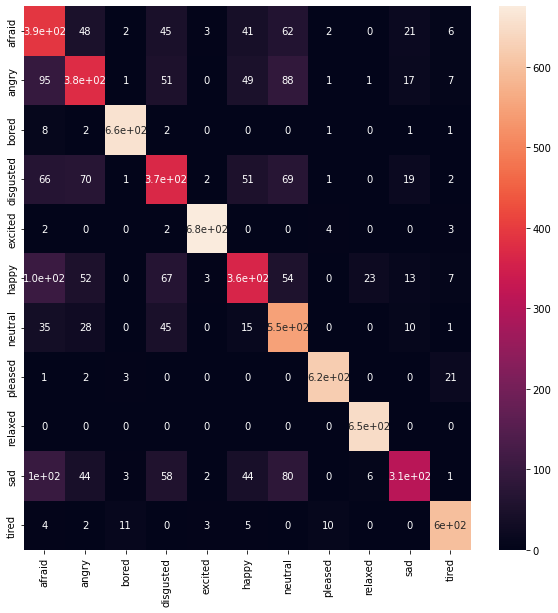

In [130]:
## Confusion Matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = pd.DataFrame(cm, target_names,target_names)
plt.figure(figsize = (10,10))

sns.heatmap(cm, annot=True)
plt.show()